![Mind Mapping](https://raw.githubusercontent.com/zacdeng/Machine-Learning/master/images/hw3.png)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_train = pd.read_csv('./hw2/train.csv')

# Data analysis

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

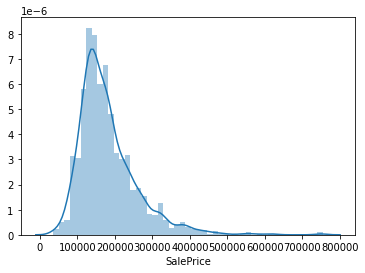

In [5]:
sns.distplot(df_train['SalePrice'])

In [6]:
df_train['SalePrice'].skew()

1.8828757597682129

In [7]:
df_train['SalePrice'].kurt()

6.536281860064529

The data conforms to the characteristics of normal distribution, but the skewness is relatively large, so the normal distribution change needs to be processed

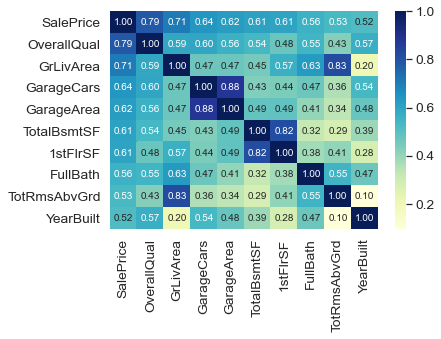

In [8]:
k = 10
corrmat = df_train.corr()
cols = corrmat.sort_values('SalePrice',ascending=False).head(k).index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values, 
                 cmap='YlGnBu')
plt.show()

* calculate the correlation of each tables

In [9]:
corrmat.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


In [10]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

* using np.corrcoef() to calculate the Person's r among top 10 
* then using sns.heatmap() to describe it

In [11]:
cm

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144,
        0.61358055, 0.60585218, 0.56066376, 0.53372316, 0.52289733],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176,
        0.5378085 , 0.47622383, 0.55059971, 0.42745234, 0.57232277],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748,
        0.4548682 , 0.56602397, 0.63001165, 0.82548937, 0.19900971],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541,
        0.43458483, 0.43931681, 0.46967204, 0.36228857, 0.53785009],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ,
        0.48666546, 0.48978165, 0.40565621, 0.33782212, 0.47895382],
       [0.61358055, 0.5378085 , 0.4548682 , 0.43458483, 0.48666546,
        1.        , 0.81952998, 0.32372241, 0.28557256, 0.391452  ],
       [0.60585218, 0.47622383, 0.56602397, 0.43931681, 0.48978165,
        0.81952998, 1.        , 0.38063749, 0.40951598, 0.28198586],
       [0.56066376, 0.55059971, 0.6300116

In [12]:
#sns.pairplot(df_train[cols],size=1.5)

# Data preprocessing

### Adjust the distribution of SalePrice


 mu = 180921.20 and sigma = 79415.29



Text(0.5, 1.0, 'SalePrice distribution')

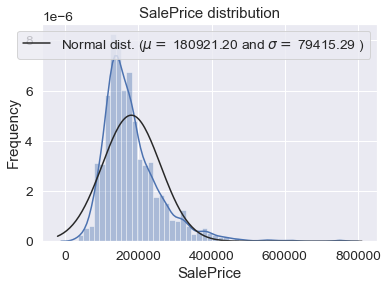

In [13]:
from scipy.stats import norm

sns.distplot(df_train['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


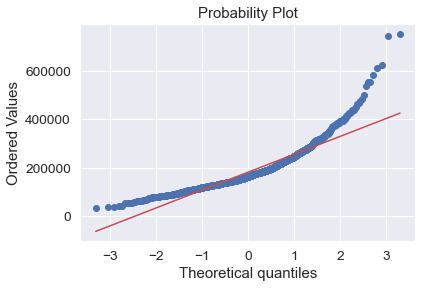

In [14]:
from scipy import stats

fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

Logarithmic transformation： x = log（1+x）
将数据转化为贴近高斯分布的形式，最后利用np.expm1()转化为正常形式


 mu = 12.02 and sigma = 0.40



Text(0.5, 1.0, 'SalePrice distribution')

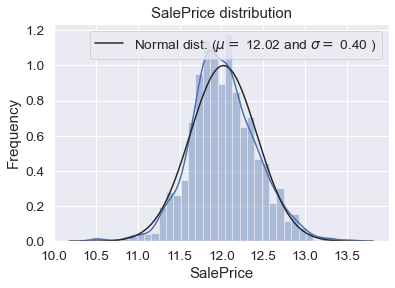

In [15]:
train_price_true = df_train["SalePrice"]
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])
sns.distplot(df_train['SalePrice'] , fit=norm)

(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

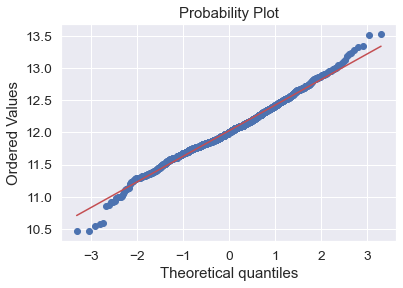

In [16]:
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

* 计算各特征值缺失数，得出百分比并合并汇表

In [17]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


* 加载test和train
* 将测试集和训练集合并统一处理

In [18]:
train = df_train
train_price = train['SalePrice']
validation = pd.read_csv('./hw2/test.csv')
validation_price = pd.read_csv('./hw2/sample_submission.csv')
validation['SalePrice'] = validation_price['SalePrice']
all_data = pd.concat((train,validation))

In [19]:
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.220949
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.778231
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.423400
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,184924.279659


In [20]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,12.072547
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,12.254868
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,12.493133
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,11.864469


In [21]:
validation

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.220949
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.778231
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.423400
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,184924.279659


* 计算Misiing Ratio
* 删掉缺失值为0的特征值

In [22]:
all_data_na = (all_data.isnull().sum() / all_data.isnull().count()) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
# 删掉缺失值为0的特征值
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageYrBlt,5.447071
GarageQual,5.447071
GarageCond,5.447071


Text(0.5, 1.0, 'Percent missing data by feature')

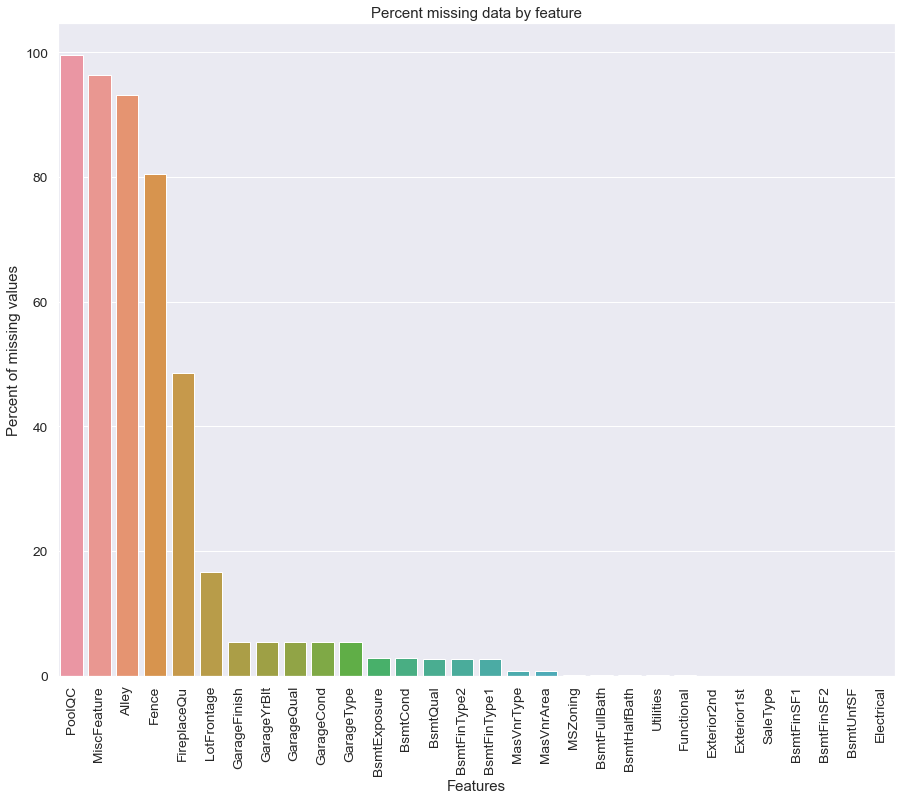

In [23]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

* PoolQC、MiscFrature、Alley、Fence、FireplaceQu的缺失率非常高
* 其他特征值略有缺失

# Question 2-1 : Using different methods to predict the LotArea

### Data processing

由于需要预测 LotArea，因此需要重新处理数据，为保证 SalePrice 的数据更为准确，这里将 SalePrice 进行高斯分布处理

In [24]:
validation_Q2 = validation
train_Q2 = train
train_Q2['SalePrice'] = np.expm1(train['SalePrice'])

In [25]:
data_Q2 = pd.concat((train_Q2,validation_Q2))

将非连续的int值特征转化为str形式方便处理

In [26]:
data_Q2['MSSubClass'] = data_Q2['MSSubClass'].astype(str)
data_Q2['OverallCond'] = data_Q2['OverallCond'].astype(str)
data_Q2['YrSold'] = data_Q2['YrSold'].astype(str)
data_Q2['MoSold'] = data_Q2['MoSold'].astype(str)
data_Q2['YearBuilt'] = data_Q2['YearBuilt'].astype(str)
data_Q2['YearRemodAdd'] = data_Q2['YearRemodAdd'].astype(str)
data_Q2['GarageYrBlt'] = data_Q2['GarageYrBlt'].astype(str)

将 LotArea 作为评测指标提取出来

In [27]:
train_y = train_Q2['LotArea']
validation_Q2_y = validation_Q2['LotArea']

用平均值填补缺失值

In [28]:
t = data_Q2.loc[:,data_Q2.columns!='LotArea']
mean_cols=t.mean()
t = t.fillna(mean_cols)  #填充缺失值

将合并后的数据集的非连续值通过pd.get_dummies将数据转换成one-hot编码，防止test和train特征值描述不同而产生的矩阵维度不对应

In [29]:
t_dum = pd.get_dummies(t)

分割train和validation

In [30]:
train_x = t_dum[:1460]
test_x = t_dum[1460:]

划分训练集和验证集

In [31]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(train_x,train_y,test_size = 0.3,random_state = 1)

引入测试模型

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

引入评估方法

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [34]:
models = [KNeighborsRegressor(),Ridge(),Lasso(),MLPRegressor(alpha=20),DecisionTreeRegressor(),ExtraTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor()]
names = ['KNNRegressor','Ridge','Lasso','MLPRegressor','DecisionTree','ExtraTree','RandomForest','AdaBoost','GradientBoost','Bagging']
MSE = []
MAE = []
R2 = []

In [35]:
def try_different_method(name,model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    MSE.append(mean_squared_error(y_pred,y_test))
    MAE.append(mean_absolute_error(y_pred,y_test))
    R2.append(r2_score(y_pred,y_test))
    print("Start " + name +'. \n')

In [36]:
for name,model in zip(names,models):
    try_different_method(name,model)

Start KNNRegressor. 

Start Ridge. 



D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6593476482.724596, tolerance: 11130877.426437277
  positive)


Start Lasso. 

Start MLPRegressor. 

Start DecisionTree. 

Start ExtraTree. 



D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Start RandomForest. 

Start AdaBoost. 

Start GradientBoost. 

Start Bagging. 



In [37]:
scores = pd.DataFrame({'methods':names, 'MAE':MAE, 'MSE':MSE, 'R2':R2})
scores.set_index('methods',inplace=True)
scores

,MAE,MSE,R2
methods,,,
KNNRegressor,4086.568037,1.028892e+08,-1.692116
Ridge,4927.839664,8.443807e+07,0.087702
Lasso,5842.493908,1.321801e+08,0.124761
MLPRegressor,3248.680190,7.067743e+07,-4.796422
DecisionTree,3133.212329,4.002900e+07,0.707561
ExtraTree,3213.057078,1.095765e+08,0.448473
RandomForest,3034.007534,9.223453e+07,0.279586
AdaBoost,4798.318934,4.148953e+07,-0.069175
GradientBoost,2490.764978,3.729990e+07,0.169846


### Model Testing

In [38]:
result = {}

def Predict(name, model):
    rets = model.predict(test_x)
    result[name] = rets
    frame = pd.DataFrame({'LotArea': rets})
    print(frame)
    plt.figure(figsize=(25,10))
    plt.plot(np.arange(1461,1461+len(validation_price)), validation_Q2_y, 'yo-', label='true value')
    plt.plot(np.arange(1461,1461+len(validation_price)), rets, 'o-', label='predict value')
    plt.xlabel("Houses' ID")
    plt.ylabel('SalePrice Prediction')
    plt.title('The Pridiction of SalePrice.')
    plt.legend()
    print(name)
    plt.show()

      LotArea
0      8777.8
1     12239.8
2      8692.2
3      9694.8
4     11445.4
...       ...
1454  11646.0
1455   7361.6
1456  11360.4
1457   9354.4
1458  10813.2

[1459 rows x 1 columns]
KNNRegressor


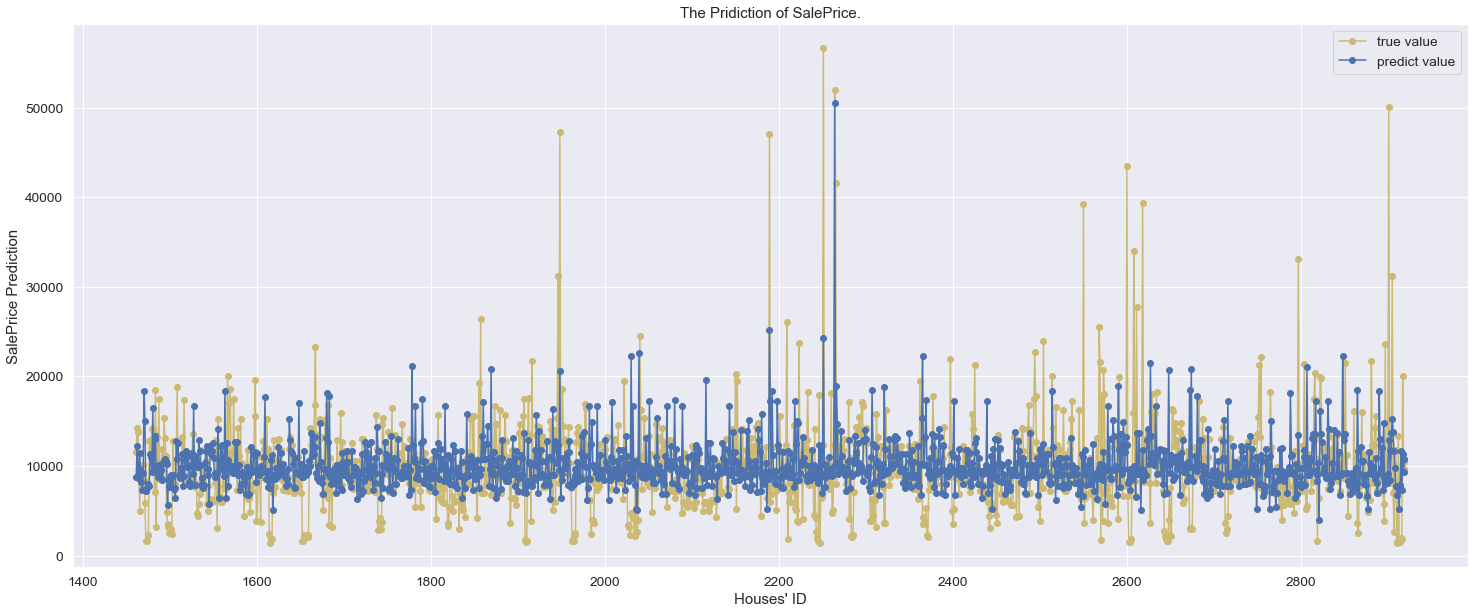

           LotArea
0      -829.354453
1     19236.876710
2      5038.954050
3      3084.632591
4      5923.021208
...            ...
1454   1167.255585
1455   1048.925467
1456  17422.628030
1457   7747.873533
1458   9046.750591

[1459 rows x 1 columns]
Ridge


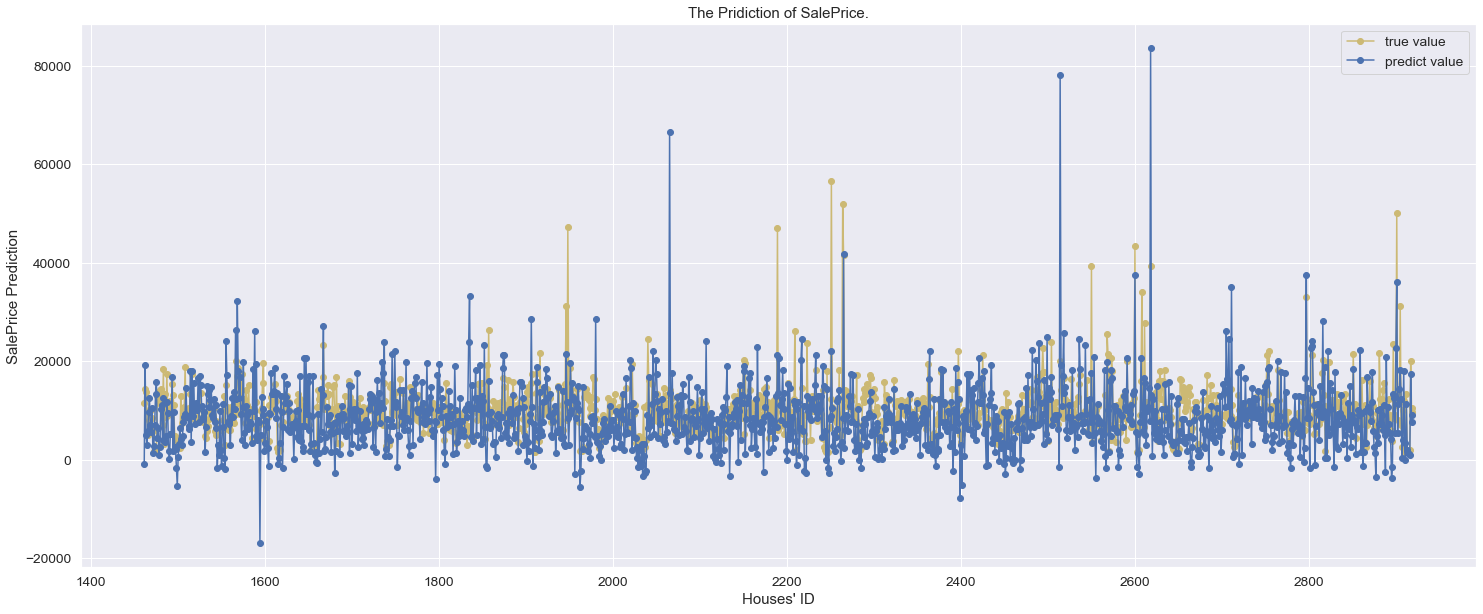

           LotArea
0     -1554.324277
1     19794.335275
2      4948.910367
3      2737.516926
4      4452.089816
...            ...
1454    -78.166463
1455   2315.136048
1456  14210.583459
1457   3819.917790
1458   8076.662459

[1459 rows x 1 columns]
Lasso


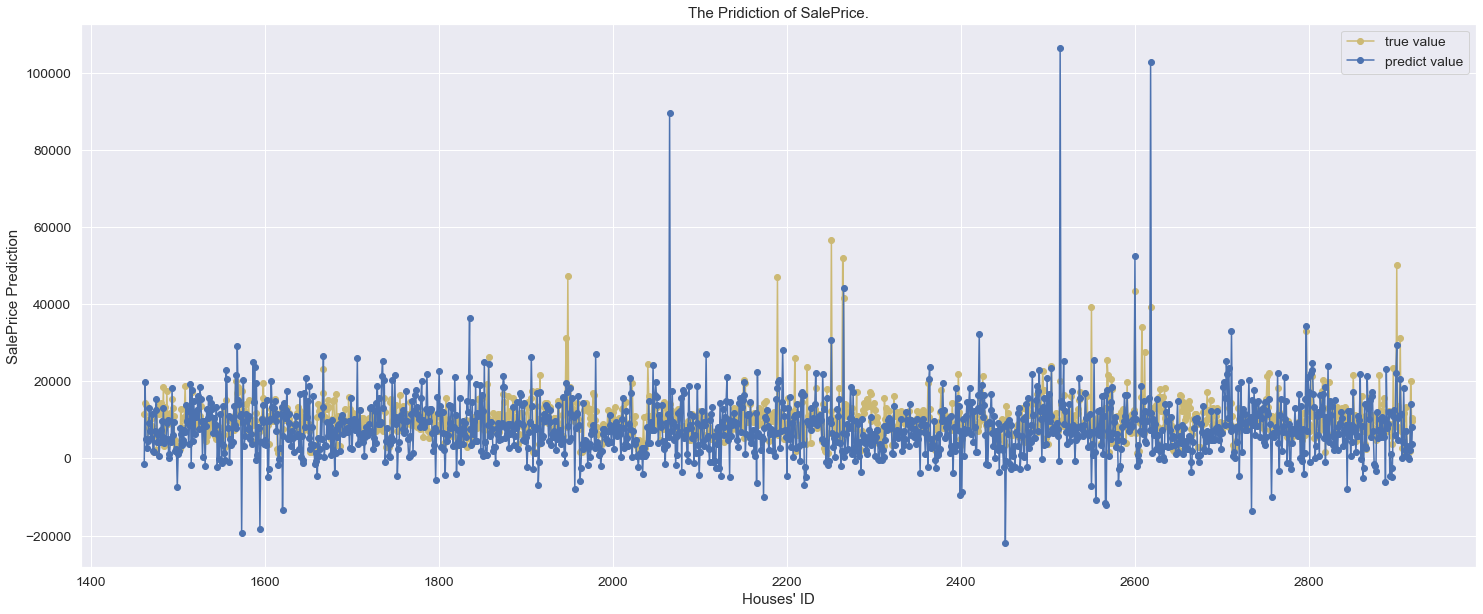

           LotArea
0      9119.627024
1     19608.934997
2     10392.876063
3      9984.816390
4      8812.800935
...            ...
1454   6717.002905
1455   7260.248729
1456  13056.050135
1457   9323.566383
1458  11191.327250

[1459 rows x 1 columns]
MLPRegressor


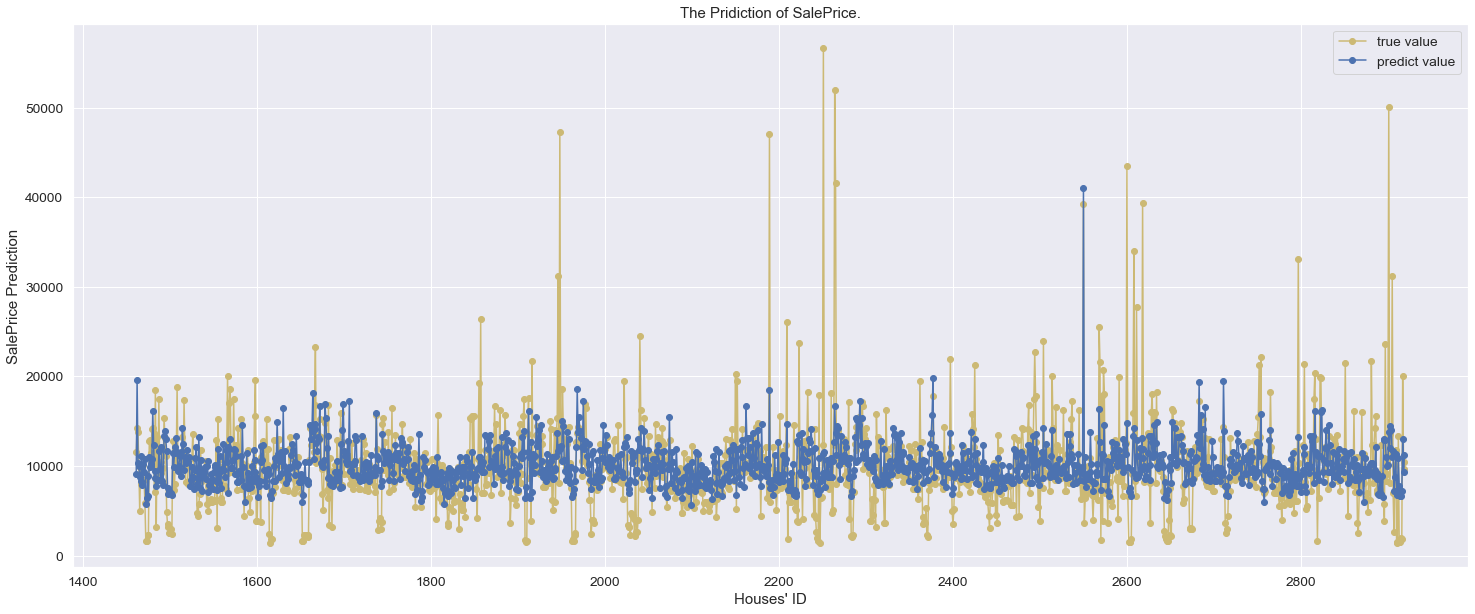

      LotArea
0      7630.0
1     26142.0
2     11207.0
3      8121.0
4     26142.0
...       ...
1454   1680.0
1455   1680.0
1456  21750.0
1457   7200.0
1458   9100.0

[1459 rows x 1 columns]
DecisionTree


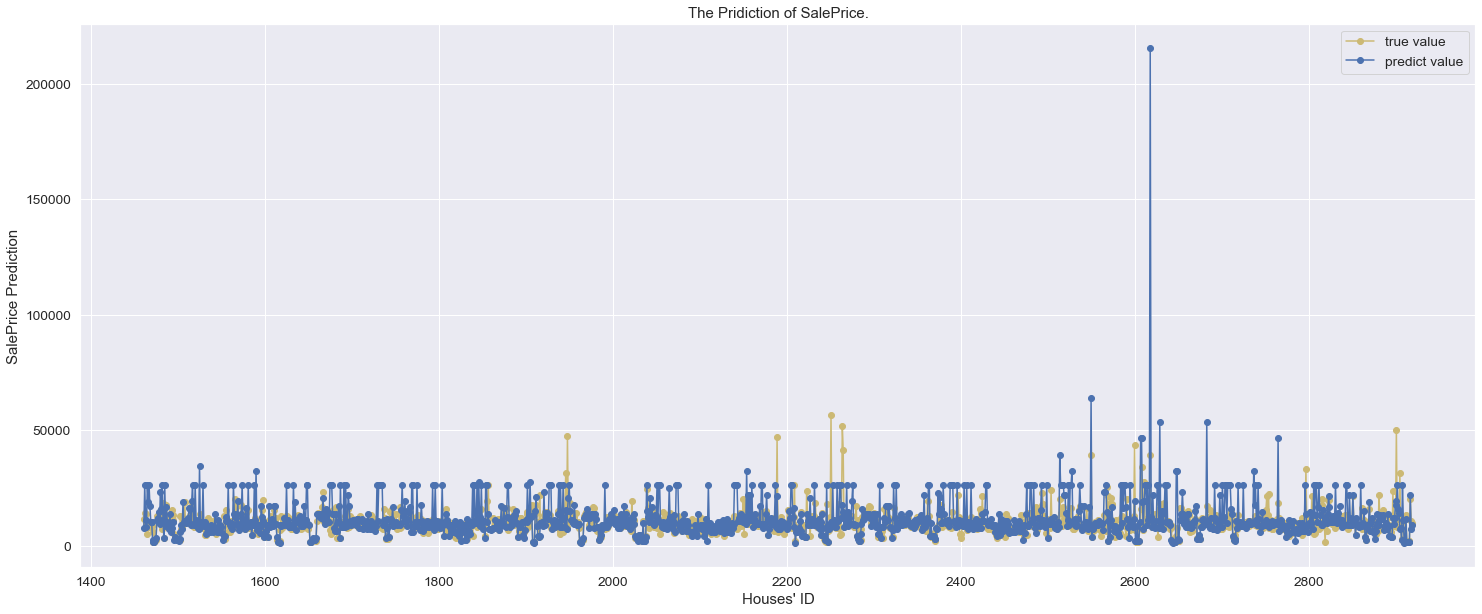

      LotArea
0      6120.0
1      7388.0
2      9084.0
3      9084.0
4      5330.0
...       ...
1454   1533.0
1455   1477.0
1456  10000.0
1457   6000.0
1458   9473.0

[1459 rows x 1 columns]
ExtraTree


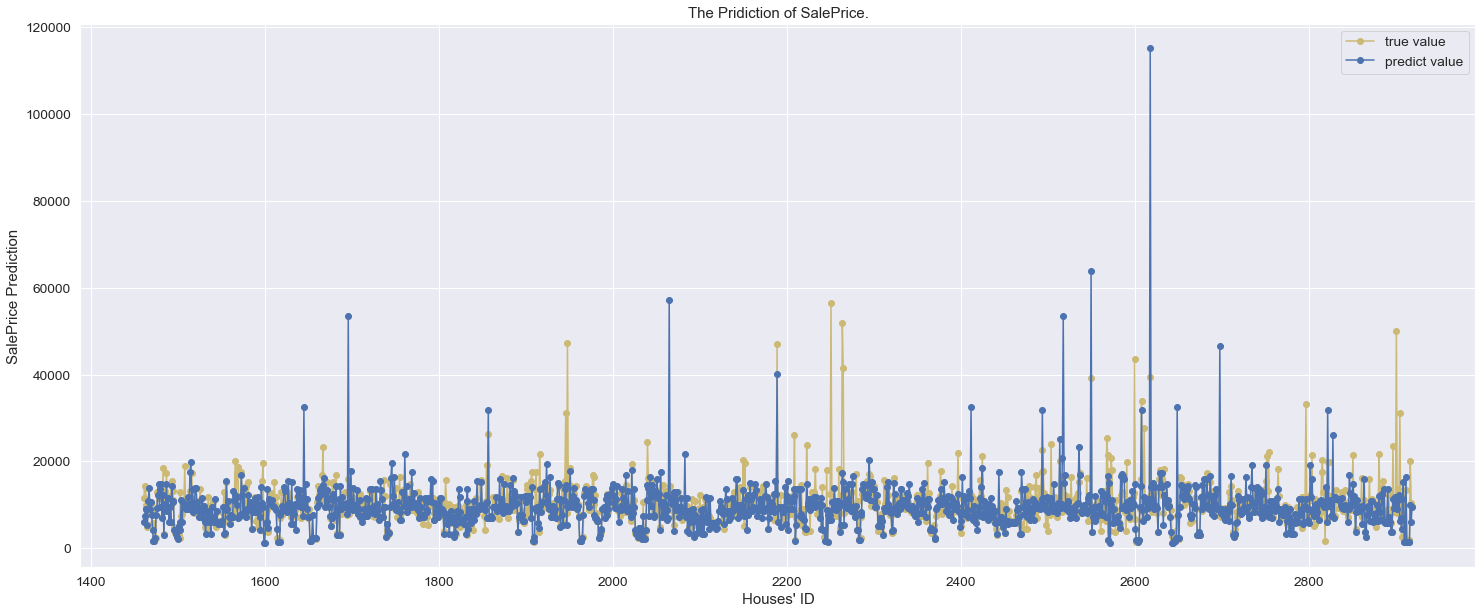

      LotArea
0      6472.9
1     14778.2
2     13611.9
3     13313.2
4      7740.7
...       ...
1454   2021.3
1455   2002.8
1456  16160.7
1457   9206.4
1458  11064.3

[1459 rows x 1 columns]
RandomForest


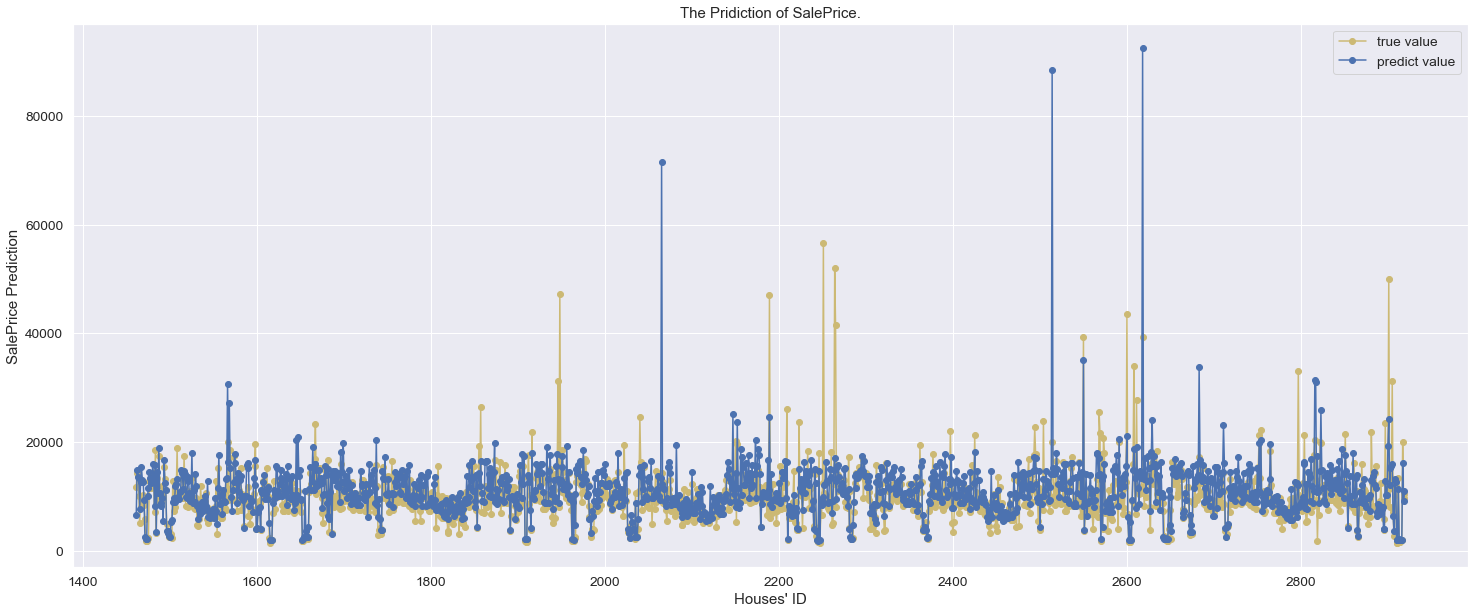

           LotArea
0     10897.991770
1     16212.108108
2     15989.088670
3     15338.649215
4     13933.006881
...            ...
1454  10501.142515
1455  10501.142515
1456  16254.867277
1457  11251.220779
1458  12990.387850

[1459 rows x 1 columns]
AdaBoost


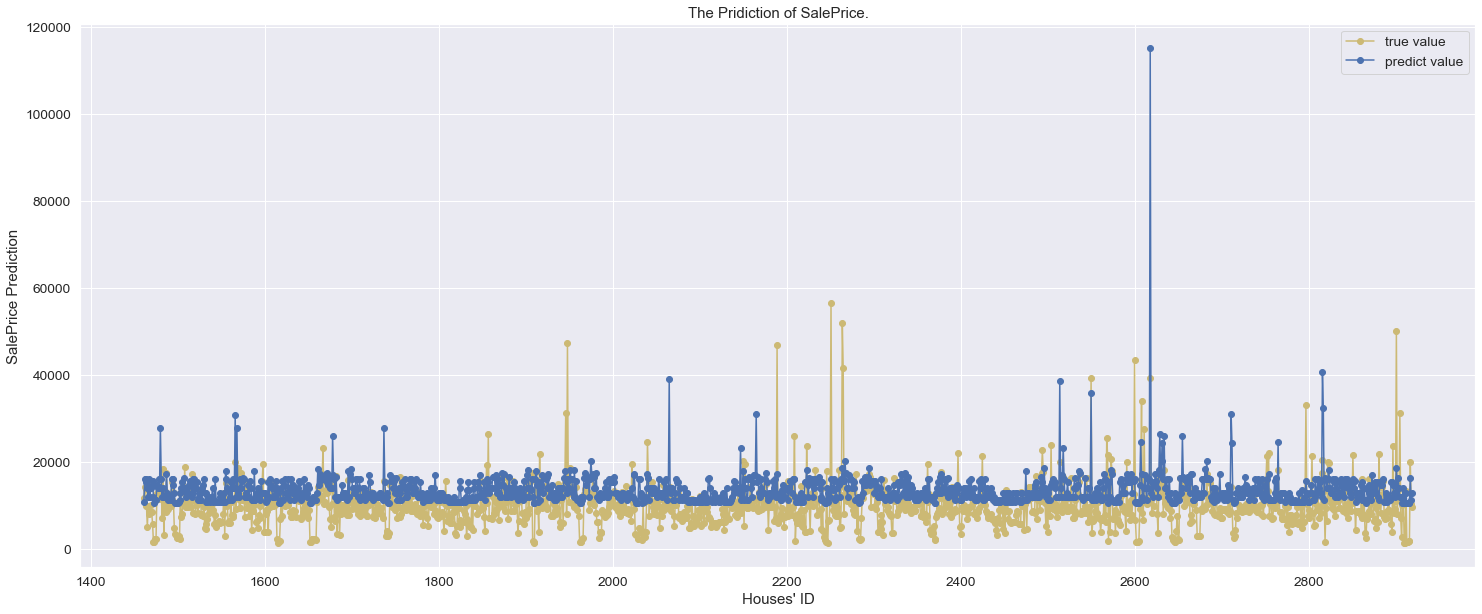

           LotArea
0      7844.888314
1     10280.769590
2     10048.276804
3      9787.306056
4      5688.414741
...            ...
1454   2470.266061
1455   3592.808441
1456  16641.865604
1457   8882.496665
1458  10083.729943

[1459 rows x 1 columns]
GradientBoost


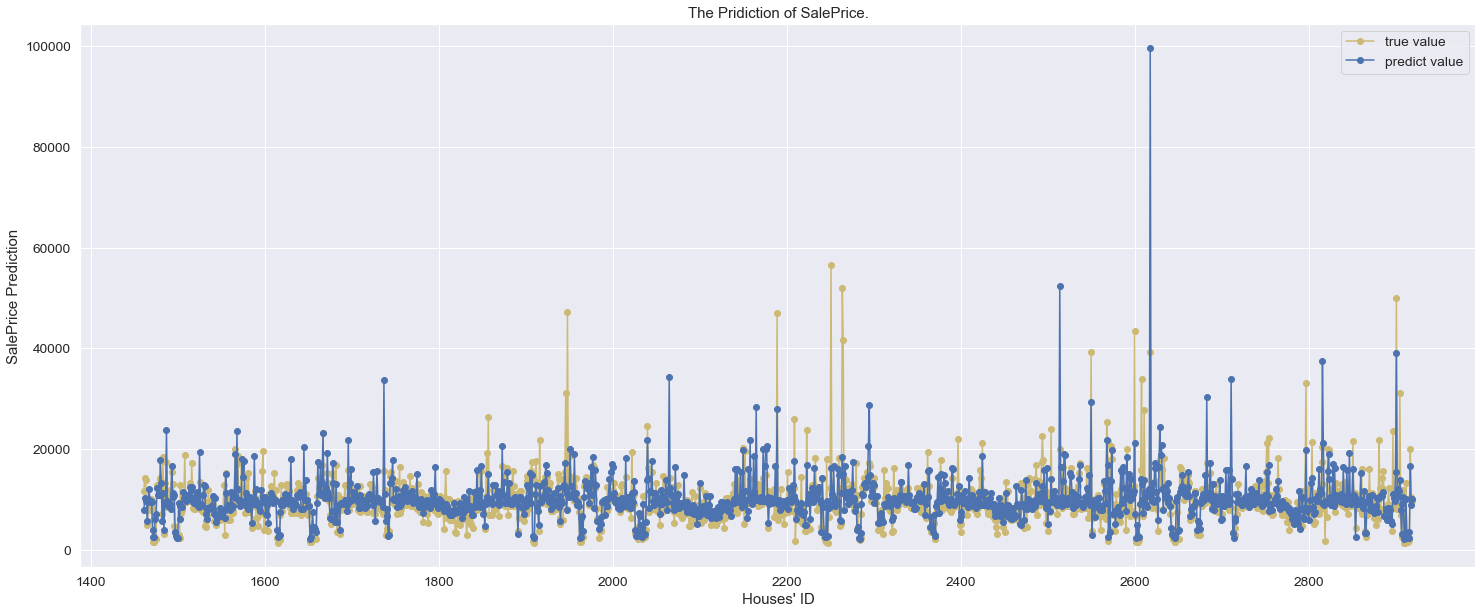

      LotArea
0      7808.0
1     12605.9
2     10222.4
3      9263.3
4      5363.4
...       ...
1454   2250.7
1455   2370.1
1456  19988.0
1457   9609.8
1458  10073.0

[1459 rows x 1 columns]
Bagging


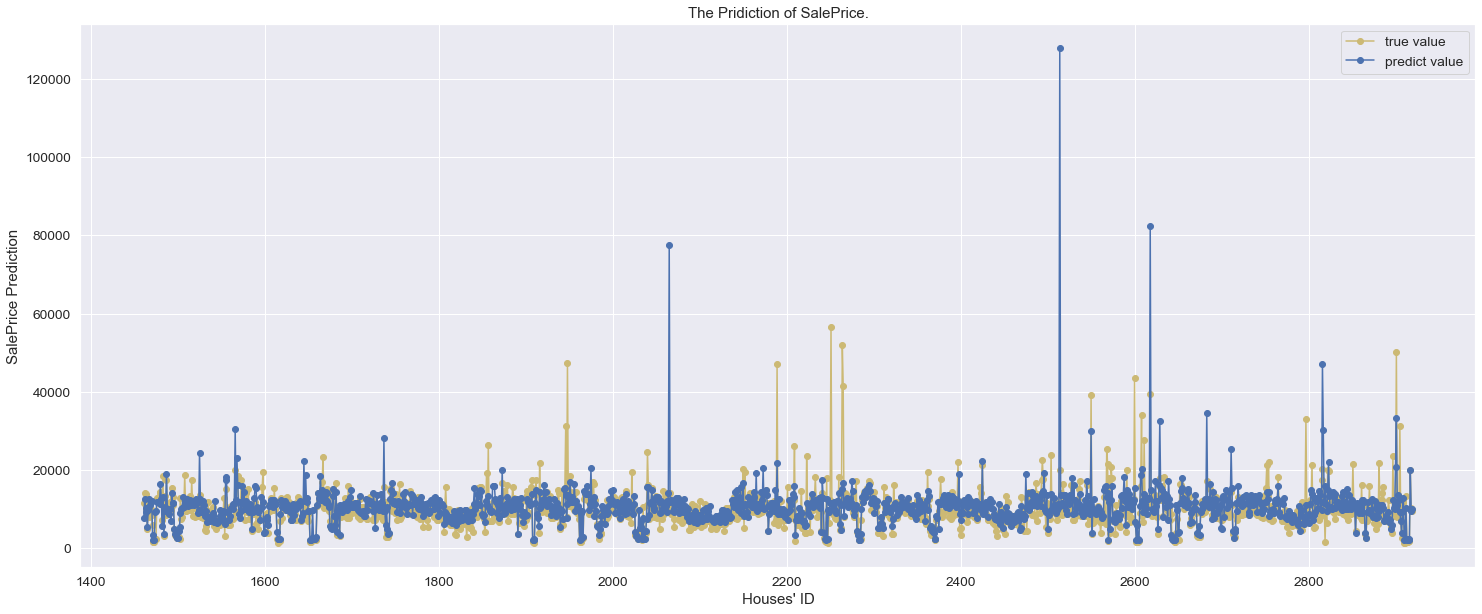

In [39]:
for name, model in zip(names,models):
    Predict(name,model)

In [40]:
result

{'KNNRegressor': array([ 8777.8, 12239.8,  8692.2, ..., 11360.4,  9354.4, 10813.2]),
 'Ridge': array([ -829.35445347, 19236.87670962,  5038.95404974, ...,
        17422.62803022,  7747.87353265,  9046.7505911 ]),
 'Lasso': array([-1554.32427749, 19794.33527534,  4948.91036716, ...,
        14210.58345864,  3819.91779046,  8076.66245904]),
 'MLPRegressor': array([ 9119.62702429, 19608.93499683, 10392.87606348, ...,
        13056.05013522,  9323.5663828 , 11191.3272503 ]),
 'DecisionTree': array([ 7630., 26142., 11207., ..., 21750.,  7200.,  9100.]),
 'ExtraTree': array([ 6120.,  7388.,  9084., ..., 10000.,  6000.,  9473.]),
 'RandomForest': array([ 6472.9, 14778.2, 13611.9, ..., 16160.7,  9206.4, 11064.3]),
 'AdaBoost': array([10897.99176955, 16212.10810811, 15989.08866995, ...,
        16254.86727689, 11251.22077922, 12990.38785047]),
 'GradientBoost': array([ 7844.88831381, 10280.76958985, 10048.27680423, ...,
        16641.86560425,  8882.49666534, 10083.72994261]),
 'Bagging': array

Save as the csv file

In [41]:
for name, ret in result.items():
    CSV = pd.DataFrame({'LotArea':ret})
    path = './hw4/%s.csv' % name
    CSV.to_csv(path)

# Question 1 : Discrete the price then use Naive Bayes to predict SalePrice

### Data Processing

将非连续的int值特征转化为str形式方便处理

In [42]:
data = all_data

data['MSSubClass'] = data['MSSubClass'].astype(str)
data['OverallCond'] = data['OverallCond'].astype(str)
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)
data['YearBuilt'] = data['YearBuilt'].astype(str)
data['YearRemodAdd'] = data['YearRemodAdd'].astype(str)
data['GarageYrBlt'] = data['GarageYrBlt'].astype(str)

用平均值填补缺失值

In [43]:
x = data.loc[:,data.columns!='SalePrice']
mean_cols=x.mean()
x = x.fillna(mean_cols)  #填充缺失值

将合并后的数据集的非连续值通过pd.get_dummies将数据转换成one-hot编码，防止test和train特征值描述不同而产生的矩阵维度不对应

In [44]:
x_dum = pd.get_dummies(x)

### Model Training

##### discrete the price
* using scatter to display the distripution of the SalePrice

显示train中SalePrice的分布

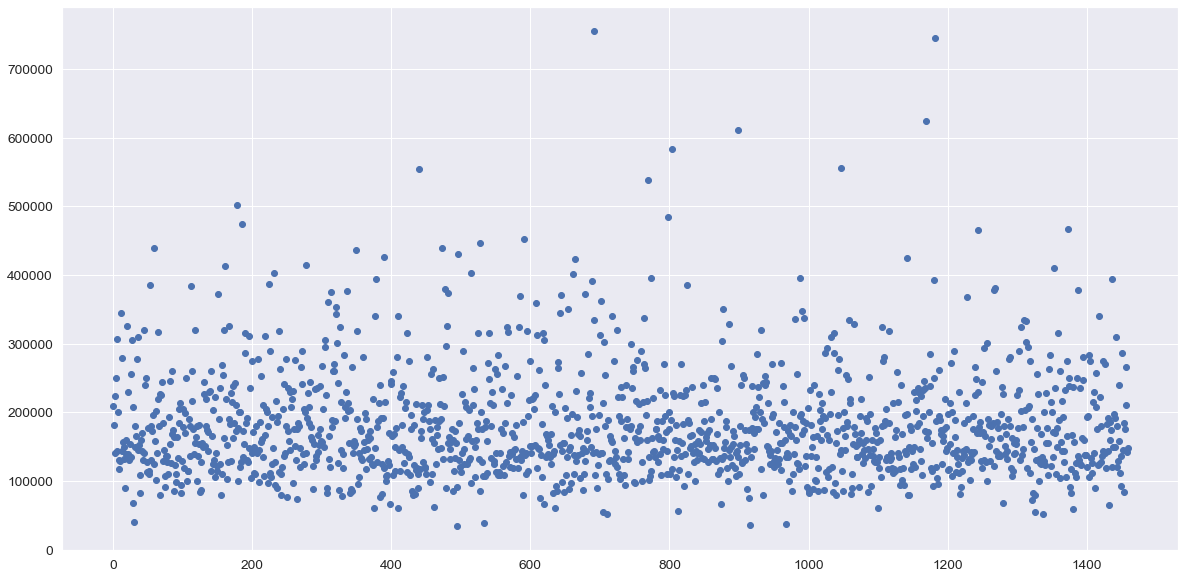

In [45]:
plt.figure(figsize=(20,10))
plt.scatter(np.array(range(0,1460)),train_price_true)

显示validation中SalePrice的分布

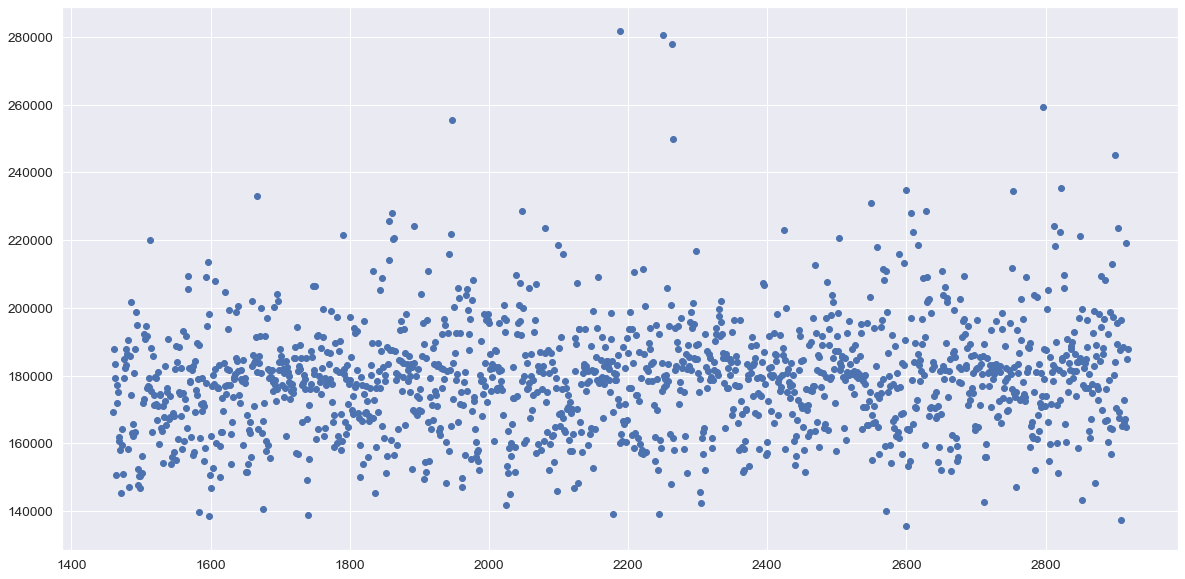

In [46]:
plt.figure(figsize=(20,10))
plt.scatter(np.array(range(1460,2919)),validation_price.SalePrice)

结果显示：
* train和validation中SalePrice的分布有很大差异，一定意义上决定了训练结果的泛化性不够，得到的预测结果准确性差

* discrete the price with four layer
* {'cheap':below 150000 ; 'moderate':150000-200000 ; 'expensive':200000+}

In [47]:
train_y2 = []
validation_y = []

def trans(Price,ls):
    for price in Price:
        if price<=170000:
            ls.append('cheap')
        elif price>170000 and price<=200000:
            ls.append('moderate')
        else:
            ls.append('expensive')

In [48]:
trans(train_price_true,train_y2)
trans(validation_price.SalePrice,validation_y)

* Labels of train and validation after discreting

In [49]:
train_y2[:10]

['expensive',
 'moderate',
 'expensive',
 'cheap',
 'expensive',
 'cheap',
 'expensive',
 'moderate',
 'cheap',
 'cheap']

* Labels of validation after discreting

In [50]:
validation_y[:10]

['cheap',
 'moderate',
 'moderate',
 'moderate',
 'cheap',
 'moderate',
 'moderate',
 'moderate',
 'cheap',
 'cheap']

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

##### naive bayes : GaussianNB

*对 x_dum 中其他连续值做高斯分布处理*

In [52]:
features = ['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea']

def transGaussian(features):
    for feature in features:
        x_dum[feature] = np.log1p(x_dum[feature])

transGaussian(features)

In [53]:
train_x_GNB = x_dum[:1460]
test_x_GNB = x_dum[1460:]
x_train_GNB, x_test_GNB, y_train_GNB, y_test_GNB = train_test_split(train_x_GNB, train_y2, test_size = 0.3, random_state=1)

In [54]:
model = GaussianNB()
scores = cross_val_score(model,train_x_GNB, train_y2,cv=10,scoring='accuracy')
print('The score of cv is :' + str(scores.mean()))
model.fit(x_train_GNB, y_train_GNB)
y_pred = model.predict(x_test_GNB)

The score of cv is :0.646477783877406


##### naive bayes : MultinomialNB

In [55]:
train_x_MNB = x_dum[:1460]
test_x_MNB = x_dum[1460:]
x_train_MNB, x_test_MNB, y_train_MNB, y_test_MNB = train_test_split(train_x_MNB, train_y2, test_size = 0.3, random_state=1)

In [56]:
model2 = MultinomialNB()
scores = cross_val_score(model2,train_x_MNB, train_y2,cv=10,scoring='accuracy')
print('The score of cv is :' + str(scores.mean()))
model2.fit(x_train_MNB, y_train_MNB)
y_pred2 = model2.predict(x_test_MNB)

The score of cv is :0.5664774538548072


##### naive bayes : BernoulliNB

In [57]:
train_x_BNB = x_dum[:1460]
test_x_BNB = x_dum[1460:]
x_train_BNB, x_test_BNB, y_train_BNB, y_test_BNB = train_test_split(train_x_BNB, train_y2, test_size = 0.3, random_state=1)

In [58]:
model3 = BernoulliNB()
scores = cross_val_score(model3,train_x_BNB, train_y2,cv=10,scoring='accuracy')
print('The score of cv is :' + str(scores.mean()))
model3.fit(x_train_BNB, y_train_BNB)
y_pred3 = model3.predict(x_test_BNB)

The score of cv is :0.7623431765178845


### Model Testing

对比三种不同的NB下对validation测试的准确度/查全率(微平均micro/宏评价macro)/f值

采用分类报告的形式：precision/recall/fi-score/均值/分类个数

In [59]:
from sklearn.metrics import classification_report

In [60]:
label_pred = model.predict(test_x_GNB)
print('\n分类报告：\n',classification_report(validation_y, label_pred))


分类报告：
               precision    recall  f1-score   support

       cheap       0.35      0.57      0.43       395
   expensive       0.10      0.34      0.16       116
    moderate       0.74      0.34      0.47       948

    accuracy                           0.41      1459
   macro avg       0.40      0.42      0.35      1459
weighted avg       0.59      0.41      0.44      1459



In [61]:
label_pred2 = model2.predict(test_x_MNB)
print('\n分类报告：\n',classification_report(validation_y, label_pred2))


分类报告：
               precision    recall  f1-score   support

       cheap       0.32      0.91      0.47       395
   expensive       0.28      0.21      0.24       116
    moderate       0.74      0.19      0.30       948

    accuracy                           0.38      1459
   macro avg       0.45      0.43      0.34      1459
weighted avg       0.59      0.38      0.34      1459



In [62]:
label_pred3 = model3.predict(test_x_BNB)
print('\n分类报告：\n',classification_report(validation_y, label_pred3))


分类报告：
               precision    recall  f1-score   support

       cheap       0.30      0.63      0.41       395
   expensive       0.08      0.32      0.13       116
    moderate       0.67      0.14      0.22       948

    accuracy                           0.28      1459
   macro avg       0.35      0.36      0.26      1459
weighted avg       0.52      0.28      0.27      1459



#### 三种 navie bayes 分类结果

In [63]:
def display(label_prediction):
    price = pd.DataFrame(validation_price)
    price['Label'] = label_prediction
    ret = price.set_index('Id')
    print(ret)

    plt.figure(figsize=(20,10))
    plt.xlabel('ID')
    plt.ylabel('SalePrice')
    plt.title('The result of classification by Naive Bayes')

    plt.hlines(y=170000, xmin=1459, xmax=2919, color='g', linestyles='--', linewidth=3.0)
    plt.hlines(y=200000, xmin=1459, xmax=2919, color='r', linestyles='--', linewidth=3.0)

    for index, row in ret.iterrows():
        if row.Label == 'cheap':
            plt.scatter(index, row.SalePrice, c='g')
        if row.Label == 'moderate':
            plt.scatter(index, row.SalePrice, c='b')
        if row.Label == 'expensive':
            plt.scatter(index, row.SalePrice, c='r')

* ##### GaussianNB

          SalePrice     Label
Id                           
1461  169277.052498     cheap
1462  187758.393989     cheap
1463  183583.683570  moderate
1464  179317.477511  moderate
1465  150730.079977  moderate
...             ...       ...
2915  167081.220949     cheap
2916  164788.778231     cheap
2917  219222.423400  moderate
2918  184924.279659  moderate
2919  187741.866657  moderate

[1459 rows x 2 columns]


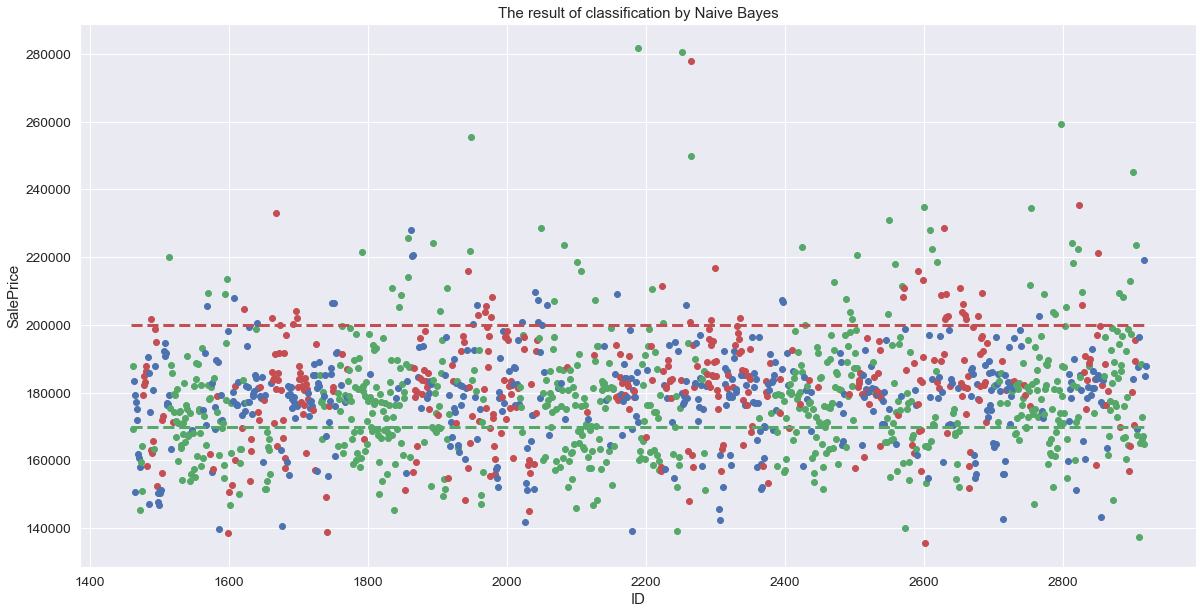

In [64]:
display(label_pred)

* ##### MultinomialNB

          SalePrice     Label
Id                           
1461  169277.052498     cheap
1462  187758.393989     cheap
1463  183583.683570  moderate
1464  179317.477511  moderate
1465  150730.079977     cheap
...             ...       ...
2915  167081.220949     cheap
2916  164788.778231     cheap
2917  219222.423400     cheap
2918  184924.279659     cheap
2919  187741.866657  moderate

[1459 rows x 2 columns]


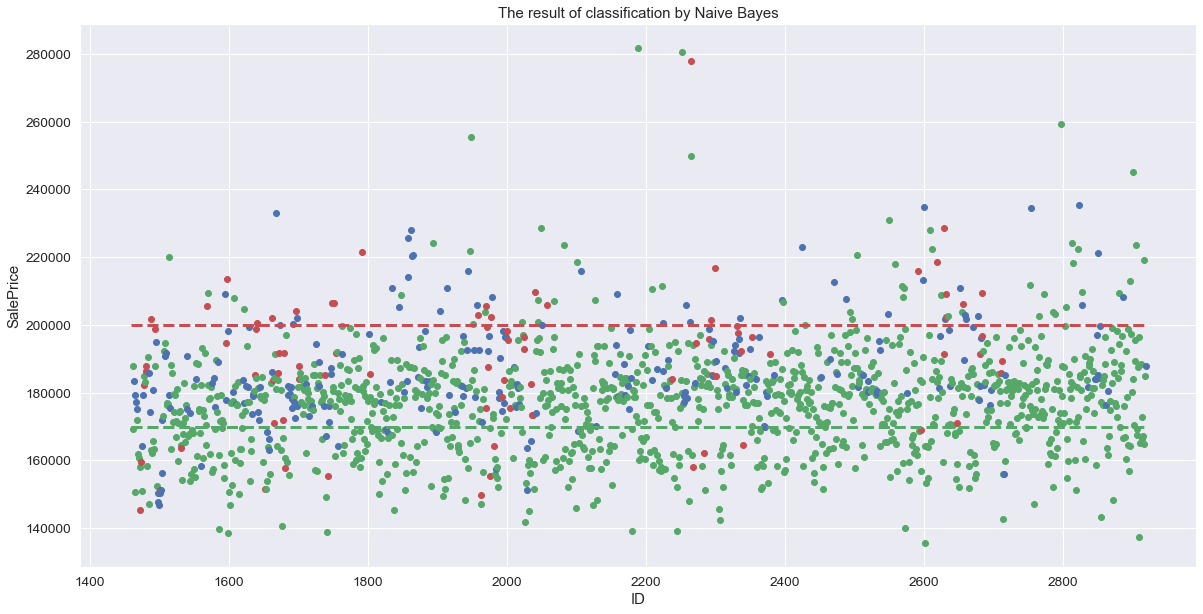

In [65]:
display(label_pred2)

* ##### BernoulliNB

          SalePrice      Label
Id                            
1461  169277.052498      cheap
1462  187758.393989      cheap
1463  183583.683570   moderate
1464  179317.477511  expensive
1465  150730.079977   moderate
...             ...        ...
2915  167081.220949      cheap
2916  164788.778231      cheap
2917  219222.423400      cheap
2918  184924.279659      cheap
2919  187741.866657   moderate

[1459 rows x 2 columns]


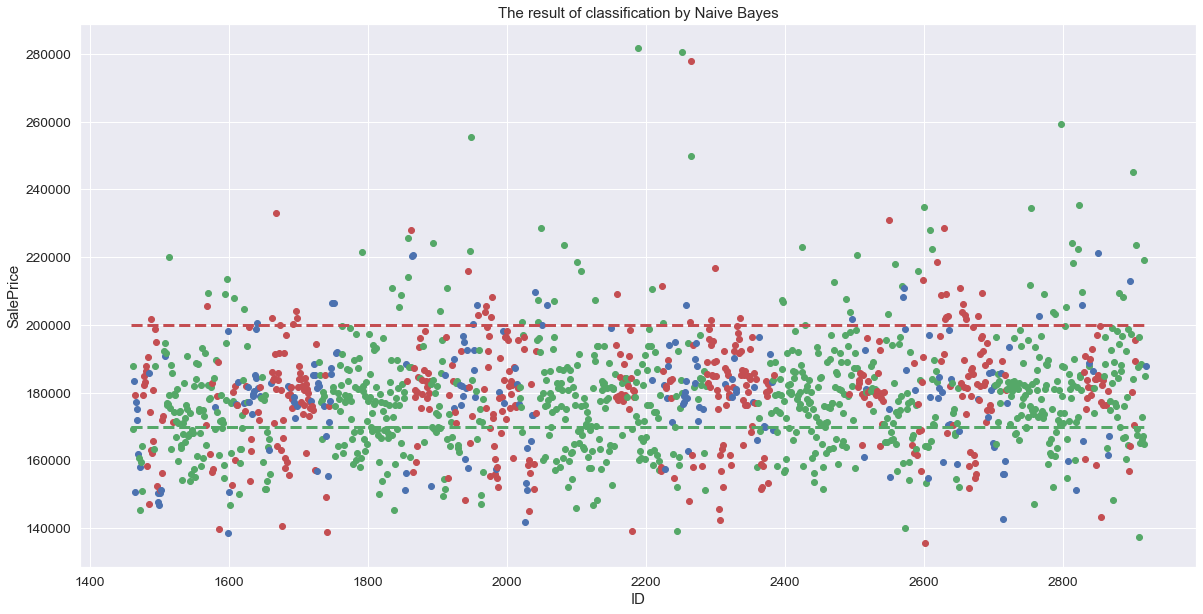

In [66]:
display(label_pred3)